In [1]:
import pandas as pd
data = pd.read_csv('mcdonalds.csv')

In [2]:
data

,category,item,calories,total_fat,calcium,sugars,protein
0,Breakfast,Egg McMuffin,300,20,25,3,17
1,Breakfast,Egg White Delight,250,12,25,3,18
2,Breakfast,Sausage McMuffin,370,35,25,2,14
3,Breakfast,Sausage McMuffin with Egg,450,43,30,2,21
4,Breakfast,Sausage McMuffin with Egg Whites,400,35,25,2,21
...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),510,26,40,64,12
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),690,35,50,85,15
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),340,17,25,43,8
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),810,50,60,103,21


1. gender: пол пациента ("Male", "Female" or "Other"): номинальное 
2. hypertension: есть ли у пациента гипертония (0, если нет, 1, если есть) - бинарное 
3. heart_disease: болезни сердца (0, если нет, 1 если есть) бинарное 
4. ever_married: женат/замужем ли пациент ("No" or "Yes") бинарное 
5. work_type: трудоустройство("children", "Govt_jov" (государственная работа), "Never_worked", "Private" or "Self-employed"(частный предприниматель)) - номинальное 
6. Residence_type: место жительства ("Rural" - в деревне or "Urban" - в городе) - номинальное (бинарное)
8. avg_glucose_level: средний уровень глюкозы в крови - непрерывное 
9. bmi: индекс массы тела - непрерывное 
10. smoking_status: статус курения ("formerly smoked" - курил в прошлом, "never smoked", "smokes" or "Unknown" - нет информации) - номинальное 
11. stroke: был инсульт или нет(1, если да, 0, если нет) - бинарное 

## Выбросы

**Выбросы** - аномальные значения, которые отличаются от МЦТ. Их можно заменить, если их мало, и удалить, если много. Есть два способа их нахождения. 

<AxesSubplot:xlabel='avg_glucose_level'>

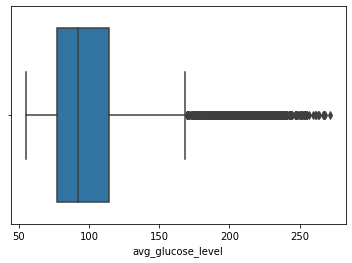

In [8]:
# визуализация выбросов
import seaborn as sns
sns.boxplot(x = data['avg_glucose_level'])

In [3]:
# 1 способ: интерквартильный размах
q1 = data['avg_glucose_level'].quantile(.25)
q3 = data['avg_glucose_level'].quantile(.75)
iqr=q3-q1
# Нижняя граница
line1 = q1 - 1.5*iqr
# Верхняя границы
line2 = q3 + 1.5*iqr
line1, line2

(21.977500000000006, 169.35750000000002)

In [4]:
data[(data['avg_glucose_level'] < line1)
     |(data['avg_glucose_level'] > line2)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5061,38009,Male,41.0,0,0,Yes,Private,Urban,223.78,32.3,never smoked,0
5062,11184,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0
5063,68967,Male,39.0,0,0,Yes,Private,Urban,179.38,27.7,Unknown,0
5064,66684,Male,70.0,0,0,Yes,Self-employed,Rural,193.88,24.3,Unknown,0


In [2]:
# 2 способ: по среднеквадратичному отклонению
mean = data['avg_glucose_level'].mean()
std = data['avg_glucose_level'].std()
# Нижняя граница
b_line = mean - 2.5*std
# Верхняя граница
u_line = mean + 2.5*std
print(b_line, u_line)

-7.0612232727370525 219.35657748017314


In [3]:
data[(data['avg_glucose_level'] < b_line)
     |(data['avg_glucose_level'] > u_line)].shape

(221, 12)

Если формулировка задания: "На 2 отклонения и больше", тогда в условие ставим ">=", "<="

## Корреляция 

**Корреляция** - показывает взаимосвязь между 2 НЕПРЕРЫВНЫМИ переменными

Есть отрицательная и положительная зависимости. Сила корреляции:

0.1 - 0.3 - слабая связь

0.3 - 0.5 - умеренная

0.5 - 0.7 - заметная

0.7 - 0.9 - высокая 

0.9 - 1.0 - сильная 

Коэффициент(выборочный коэффициент корреляции Пирсона) корреляции принимает значения в интервале от -1 до 1. 

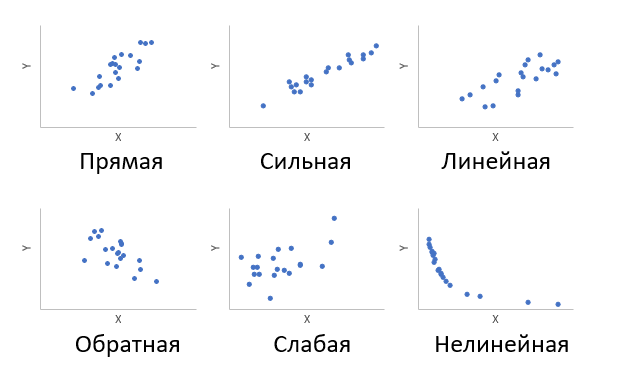

In [6]:
data.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [7]:
data.corr()['avg_glucose_level'].sort_values()

id                   0.001092
stroke               0.131945
heart_disease        0.161857
hypertension         0.174474
bmi                  0.175502
age                  0.238171
avg_glucose_level    1.000000
Name: avg_glucose_level, dtype: float64

In [6]:
data.corr()['avg_glucose_level'].sort_values(ascending = False)

avg_glucose_level    1.000000
age                  0.238171
bmi                  0.175502
hypertension         0.174474
heart_disease        0.161857
stroke               0.131945
id                   0.001092
Name: avg_glucose_level, dtype: float64

In [16]:
data[['age', 'avg_glucose_level', 'bmi']].corr()

,age,avg_glucose_level,bmi
age,1.000000,0.238171,0.333398
avg_glucose_level,0.238171,1.000000,0.175502
bmi,0.333398,0.175502,1.000000


In [8]:
data['age'].corr(data['avg_glucose_level'])

0.2381711141017434

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

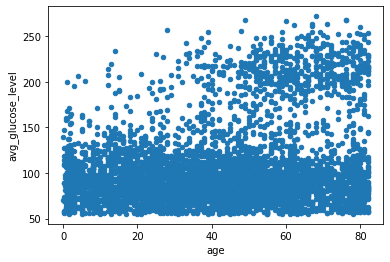

In [9]:
# сначала пишем age - независимая переменная, глюкоза - зависимая
data.plot('age','avg_glucose_level', kind = 'scatter')

In [15]:
import numpy as np 
X = np.array([14, 15, 50, 60])
Y = np.array([2, 4, 5, 6])
np.corrcoef(X,Y)

array([[1.        , 0.88176646],
       [0.88176646, 1.        ]])

## Линейная регрессия 

**Линейная регрессия** - это предсказание. Где есть предиктор(регрессор, независимая переменная, признак) - x, целевая переменная (зависимая переменная) - y, и предикт

In [ ]:
y = kx+b

In [ ]:
4  7ч  6
5  8ч  5
6  9ч  7

В корреляции мы также сталкиваемся с независимыми и целевыми переменными. Как y зависит от x?. По этой причине мы в КОРРЕЛЯЦИИ не говорим про ВЛИЯНИЕ, а только про ЗАВИСИМОСТЬ. И то, возможную.

Еще немного о терминах: каждая строка называется наблюдением/объект. Столбцы - переменные/признаком. 

Среднеквадратичная ошибка имеет 2 особенности
1. никогда не будет отриц числом 
2. очень редко бывает равна 0, (если парная регрессия равна 0)
3. может быть любым полож числом

<AxesSubplot:xlabel='X', ylabel='Y'>

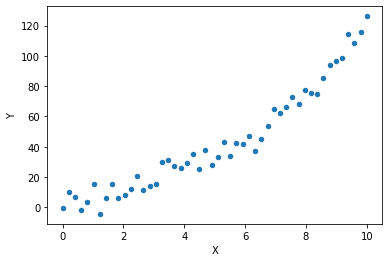

In [6]:
# Задание 19
import pandas as pd 
data = pd.read_csv('b4.csv')
data.plot('X','Y', kind = 'scatter')

In [ ]:
Между переменными 𝑋
 и 𝑌
 существует отрицательная линейная взаимосвязь

При прочих равных, при увеличении переменной 𝑋
 переменная 𝑌
 не изменится

Между переменными 𝑋
 и 𝑌
 отсутствует линейная взаимосвязь

Между переменными 𝑋
 и 𝑌
 существует положительная линейная взаимосвязь

<AxesSubplot:xlabel='X', ylabel='Y'>

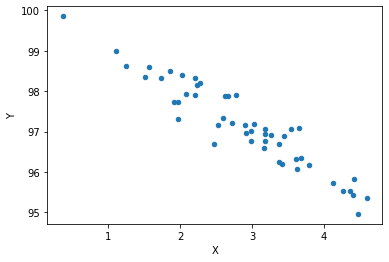

In [15]:
df = pd.read_csv('b4-5.csv')
df.plot('X','Y', kind = 'scatter')

In [ ]:
Наибольшее значение \(Y\) составляет более 200


Визуально в выборке есть хотя бы один выброс


Переменные связаны положительной линейной взаимосвязью


Наибольшее значение \(X\) составляет более 10

## Потренируемся

In [24]:
x1 = data['M1'].mode()[0]
x2 = data['M2'].min()
# округление до сотых, как сказано на экзамене
round(x1-x2, 2)

129.89

In [25]:
data['time'].value_counts()

11:15 PM    4
8:11 AM     4
2:04 AM     3
1:02 AM     3
1:59 AM     3
           ..
4:18 AM     1
7:41 PM     1
6:45 PM     1
3:34 PM     1
7:22 AM     1
Name: time, Length: 652, dtype: int64

In [29]:
data['coded'] = data['M2'].apply(lambda x: 0 if x<data['M2'].mean() else 1)

In [34]:
round(data['coded'].median(),2)

0.0

In [ ]:
Маша: объяснить коды корреляции, 14,15,16,17,18,19 задания. 

In [ ]:
р  0 2 13 15
п  0 5 10 15 

р-п 0 -3 3 0  - отклонения

(р-п)**2 = 0 9 9 0 

18/4 = 4.5